\hfill Department of Statistics

\hfill Jaeyeong Kim, Alex Ruiz

In [1]:
from theano import config
THEANO_FLAGS='mode=FAST_RUN,device=gpu,floatX=float32 python my_keras_script.py'

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import numpy as np

def one_NN(X_train, Y_train, X_test, Y_test, k, learning_rate, n_batch):
    m, n = X_train.shape
    # create model
    model = Sequential()
    model.add(Dense(k, input_dim = n, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Optimizer
    adam = Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None,\
                decay=0.0, amsgrad=False)
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['acc'])
    # Fit the model
    model.fit(X_train, Y_train, epochs=100, batch_size=n_batch, verbose = 0)
    # evaluate the model
    score_train = model.evaluate(X_train, Y_train, verbose = 0)
    score_test = model.evaluate(X_test, Y_test, verbose = 0)
    scores = score_train, score_test
    return scores



def two_NN(X_train, Y_train, X_test, Y_test, k, learning_rate, n_batch):
    m, n = X_train.shape
    # create model
    model = Sequential()
    model.add(Dense(128, input_dim=n, activation='relu'))
    model.add(Dense(k, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Optimizer
    adam = Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None, \
                decay=0.0, amsgrad=False)
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['acc'])
    # Fit the model
    model.fit(X_train, Y_train, epochs=100, batch_size=n_batch, verbose = 0)
    # evaluate the model
    score_train = model.evaluate(X_train, Y_train, verbose = 0)
    score_test = model.evaluate(X_test, Y_test, verbose = 0)
    scores = score_train, score_test
    return scores



Using Theano backend.


## MiniBooNE

In [3]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Reading in the gisette data set
data = pd.read_csv('Miniboone\MiniBooNE.csv', header = None,)#.dropna(axis='columns')
X_data = data.loc[:,1:]
Y_data = data[0]

ks = np.array([32, 64, 128, 256])

error_results = []
# Run logistic regression
for k in ks:
    error_randoms = []
    for i in range(10):
        #train test split
        X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data,\
                                            random_state = i, test_size = 0.2)
        #normalize the train and validation data sets.
        X_train = preprocessing.scale(X_train)
        X_test = preprocessing.scale(X_test)
        
        scores = one_NN(X_train, Y_train, X_test, Y_test, k, 0.01, 256)
        score_train, score_test = scores
        error_randoms.append((1-np.float32(score_train[1]), \
                              1-np.float32(score_test[1])))
    error_results.append((k, np.mean(error_randoms[0]), \
                          np.mean(error_randoms[1])))
    
x1 = pd.DataFrame(data = error_results, columns = ['k',\
                                'error_train', 'error_valid'])

error_results = []
for k in ks:
    error_randoms = []
    for i in range(10):
        #train test split
        X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data,\
                                            random_state = i, test_size = 0.2)
        #normalize the train and validation data sets.
        X_train = preprocessing.scale(X_train)
        X_test = preprocessing.scale(X_test)
        
        scores = two_NN(X_train, Y_train, X_test, Y_test, k, 0.01, 256)
        score_train, score_test = scores
        error_randoms.append((1-np.float32(score_train[1]), \
                              1-np.float32(score_test[1])))
    error_results.append((k, np.mean(error_randoms[0]), \
                          np.mean(error_randoms[1])))
    
y1 = pd.DataFrame(data = error_results, columns = ['k',\
                                'error_train', 'error_valid'])

In [4]:
x1

,k,error_train,error_valid
0,32,0.070355,0.071787
1,64,0.060806,0.062632
2,128,0.060052,0.066496
3,256,0.064247,0.066390


In [5]:
y1

,k,error_train,error_valid
0,32,0.059091,0.059288
1,64,0.058447,0.058389
2,128,0.057447,0.058029
3,256,0.059173,0.060532


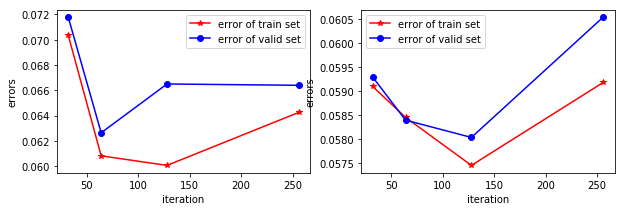

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the results
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(x1['k'], x1['error_train'], 'r-*', label='error of train set')
plt.plot(x1['k'], x1['error_valid'], 'b-o', label='error of valid set')
plt.xlabel('iteration')
plt.ylabel('errors')
plt.legend()

plt.subplot(122)
plt.plot(y1['k'], y1['error_train'], 'r-*', label='error of train set')
plt.plot(y1['k'], y1['error_valid'], 'b-o', label='error of valid set')
plt.xlabel('iteration')
plt.ylabel('errors')
plt.legend()
plt.show()

## madelon

In [7]:
import numpy as np
from sklearn import preprocessing

# Reading in the MADELON data set
X_train = pd.read_csv('madelon\madelon_train.data', header = None,\
                      delimiter = ' ').dropna(axis='columns')
Y_train = pd.read_csv('madelon\madelon_train.labels', header = None)
#Y_train = np.array(np.float32(Y_train))

X_test = pd.read_csv('madelon\madelon_valid.data', header = None, \
                      delimiter = ' ').dropna(axis='columns')
Y_test = pd.read_csv('madelon\madelon_valid.labels', header = None)
#Y_test = np.array(np.float32(Y_test))

#normalize the train and validation data sets.
X_train = np.array(preprocessing.scale(X_train))
X_test = np.array(preprocessing.scale(X_test))
Y_train = (Y_train+1)/2
Y_test = (Y_test+1)/2

ks = np.array([32, 64, 128, 256])

error_results = []
# Run logistic regression
for k in ks:
    scores = one_NN(X_train, Y_train, X_test, Y_test, k, 0.003, 16)
    score_train, score_test = scores
    error_results.append((k, 1-np.float32(score_train[1]),\
                          1-np.float32(score_test[1])))
        
x3 = pd.DataFrame(data = error_results, columns = ['k',\
                                'error_train', 'error_valid'])

error_results = []
for k in ks:
    scores = two_NN(X_train, Y_train, X_test, Y_test, k, 0.003, 16)
    score_train, score_test = scores
    error_results.append((k, 1-np.float32(score_train[1]), \
                          1-np.float32(score_test[1])))
    
y3 = pd.DataFrame(data = error_results, columns = ['k',\
                                'error_train', 'error_valid'])

C:\Users\Jay_Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  
C:\Users\Jay_Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  from ipykernel import kernelapp as app


In [8]:
x3

,k,error_train,error_valid
0,32,0.0,0.416667
1,64,0.0,0.390000
2,128,0.0,0.406667
3,256,0.0,0.400000


In [9]:
y3

,k,error_train,error_valid
0,32,0.0,0.410000
1,64,0.0,0.406667
2,128,0.0,0.383333
3,256,0.0,0.406667


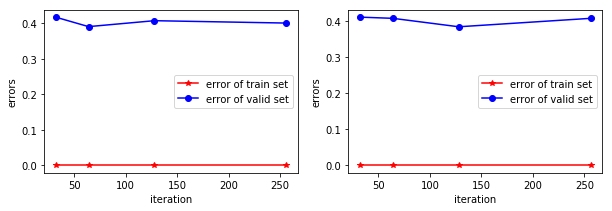

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the results
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(x3['k'], x3['error_train'], 'r-*', label='error of train set')
plt.plot(x3['k'], x3['error_valid'], 'b-o', label='error of valid set')
plt.xlabel('iteration')
plt.ylabel('errors')
plt.legend()

plt.subplot(122)
plt.plot(y3['k'], y3['error_train'], 'r-*', label='error of train set')
plt.plot(y3['k'], y3['error_valid'], 'b-o', label='error of valid set')
plt.xlabel('iteration')
plt.ylabel('errors')
plt.legend()
plt.show()
